>* We will train the hate speech classifier by training annotated dataset by De Gibert et al. (2018)
>* First, you'll need to clone the repository from the github in the link below
>* https://github.com/Vicomtech/hate-speech-dataset

>* In your terminal, go to the directory where you want to clone the repository. To see where you are at, `ls -l`, and `cd ..` to go to the upper level (parent directory), and `cd [NAME OF THE DIRECTORY]` to go to the directory you want to go to. Then, `git clone https://github.com/Vicomtech/hate-speech-dataset.git`

>* You will find the dataset in the `annotations_metadata.csv` file
>* Let's read the csv file and have a glance at the dataset


In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('../hate-speech-dataset/annotations_metadata.csv')

In [3]:
data.head(5)

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate


In [4]:
data['label'].unique()

array(['noHate', 'hate', 'idk/skip', 'relation'], dtype=object)

In [5]:
data['label'].value_counts()

label
noHate      9507
hate        1196
relation     168
idk/skip      73
Name: count, dtype: int64

In [6]:
data[data['label']=='noHate']

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
4,12834217_5,572066,1346,0,noHate
5,12834217_6,572066,1346,0,noHate
...,...,...,...,...,...
10938,33676864_4,734541,1388,0,noHate
10939,33676864_5,734541,1388,0,noHate
10940,33677019_1,735154,1388,0,noHate
10941,33677019_2,735154,1388,0,noHate


In [7]:
training=data[(data['label']=='noHate')|(data['label']=='hate')]

In [8]:
training['label'].value_counts()

label
noHate    9507
hate      1196
Name: count, dtype: int64

In [9]:
training['class']=training['label'].apply(lambda x: 1 if x=='hate' else 0)

/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2502/755911698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['class']=training['label'].apply(lambda x: 1 if x=='hate' else 0)


In [10]:
training['class'].value_counts()

class
0    9507
1    1196
Name: count, dtype: int64

>* We will import `os` to get the name of the files in the training dataset folder from the repository

In [11]:
import os

In [12]:
len(os.listdir('../hate-speech-dataset/all_files'))

10944

>* We will call each file and read the text in the file and create a dictionary with the file name (key) and the text (value)

In [13]:
all_dict={}
for file in os.listdir('../hate-speech-dataset/all_files'):
    with open('../hate-speech-dataset/all_files/'+file, 'r') as content:
        all_dict[file.strip('.txt')]=content.read()

In [14]:
len(all_dict)

10944

In [15]:
training['text']=training['file_id'].apply(lambda x: all_dict[x])
#This will populate the text column with the content of the file in accordance with 
#the file_id column

/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2502/856071315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['text']=training['file_id'].apply(lambda x: all_dict[x])


>* Once we have the class (e.g., 0 for non-hate speech, 1 for hate speech), we will train the classifier using the `text` column and the `class` column

>* With the training dataset, let's classify the Parler dataset from week 6

In [16]:
parler=pd.read_csv('../week6/subset-2021-01-11-voter_fraud.csv')

In [17]:
parler.columns

Index(['article', 'body', 'bodywithurls', 'comments', 'createdAt',
       'createdAtformatted', 'creator', 'datatype', 'depth', 'depthRaw',
       ...
       'urls.15.createdAt', 'urls.15.domain', 'urls.15.id', 'urls.15.long',
       'urls.15.metadata.length', 'urls.15.metadata.mimeType',
       'urls.15.metadata.site', 'urls.15.modified', 'urls.15.short',
       'urls.15.state'],
      dtype='object', length=420)

In [18]:
content=parler[['body','username']]

In [19]:
content

,body,username
0,Folks may be our last posts. Pogilosi just ask...,Terryb158
1,Oh notre they want to investigate something. L...,AlanBond7
2,White trash pieces of shit who are going to be...,Tifdog11
3,He has never lived in a totalitarian country; ...,AlexaImmigrant
4,White trash pieces of shit who are going to be...,Tifdog11
...,...,...
86,GRAHAM\nHe begged us for money on Hannity and ...,Millsfarms
87,Neither is election fraud.,xfitnesscoach
88,"Investigation of fraudulent voting practices, ...",Bobbfishen
89,Why did Nunes recuse himself on the election f...,BarryOKenyan


>* When we think about the classification task, we need to think about `what to classify` and `how to classify`
>* `What to classify`: unigram count vectorizer, tf-idf vectorizer
>* `How to classify`: Naive Bayes, Support Vector Machine (SVM), and Logistic Regression (LR)

In [20]:
#!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

>* Convert the text into a vector representation for training and testing

In [21]:
unigram_count_vectorizer=CountVectorizer(encoding='latin-1', ngram_range=(1,1))
tfidf_vectorizer=TfidfVectorizer(encoding='latin-1', ngram_range=(1,1))

In [22]:
X1=unigram_count_vectorizer.fit_transform(training['text'])
#prepare training data as a vector representation   
X1_predict=unigram_count_vectorizer.transform(content['body'])
#prepare the target as a vector representation
X1_tfidf=tfidf_vectorizer.fit_transform(training['text'])
#prepare training data as a vector representation
X1_tfidf_predict=tfidf_vectorizer.transform(content['body'])
#prepare the target as a vector representation

In [23]:
X1.toarray().shape
#each row represents a document and 
#the length is determined by the number of unique words in the corpus


(10703, 15871)

In [24]:
X1_predict.toarray().shape

(91, 15871)

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

>* Let's train the `Multinomial Naive Bayes classifier` with the `Unigram Count Vectorizer`

In [26]:
nb=MultinomialNB().fit(X1, training['class'])
nb.predict(X1_predict)
#only index 42 has been classified as hate speech

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [27]:
index_numbers=[i for i in range(len(nb.predict(X1_predict))) if nb.predict(X1_predict)[i]==1]

In [28]:
from pprint import pprint
pprint(training['text'].iloc[index_numbers[0]])

('Greece need a man like Adolf Hitler and now is the perfect time to start a '
 'national political movement to free Your country from the zionist bankers')


>* Let's train the `Support Vector Machine (SVM) classifier` with the `Unigram Count Vectorizer`

In [29]:
svc=SVC(kernel='linear').fit(X1, training['class'])
svc.predict(X1_predict)
#interestingly, the svm model flagged more content as hate speech

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1])

In [30]:
index_numbers = [i for i, num in enumerate(svc.predict(X1_predict)) if num == 1]
print(len(index_numbers))
#27 contents have been flagged as hate speech

27


In [31]:
content['body'].iloc[index_numbers]

2     White trash pieces of shit who are going to be...
4     White trash pieces of shit who are going to be...
6     White trash pieces of shit who are going to be...
8     Well they already made sure of that when they ...
16    Those sleazbags dems are trying to pull off a ...
19    White trash pieces of shit who are going to be...
26    Traitor seems a relative term to you. It seems...
28    why bother if they get away with this election...
29    White trash pieces of shit who are going to be...
32    White trash pieces of shit who are going to be...
33    White trash pieces of shit who are going to be...
36    White trash pieces of shit who are going to be...
44    White trash pieces of shit who are going to be...
49    White trash pieces of shit who are going to be...
51    @halfcrazy First of all I'm.not a guy..duh..se...
53    White trash pieces of shit who are going to be...
60    White trash pieces of shit who are going to be...
64    Ya'll need to stop believing this shit . W

>* Let's train the `Logistic Regression (LR) classifier` with the `Unigram Count Vectorizer`

In [32]:
lr=LogisticRegression().fit(X1, training['class'])
lr.predict(X1_predict)

/Users/mstudio/miniconda3/envs/is6750/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1])

In [33]:
index_numbers = [i for i, num in enumerate(lr.predict(X1_predict)) if num == 1]
print(len(index_numbers)) 
#27 contents have been flagged as hate speech

27


In [34]:
content['body'].iloc[index_numbers]

0     Folks may be our last posts. Pogilosi just ask...
2     White trash pieces of shit who are going to be...
4     White trash pieces of shit who are going to be...
6     White trash pieces of shit who are going to be...
16    Those sleazbags dems are trying to pull off a ...
19    White trash pieces of shit who are going to be...
26    Traitor seems a relative term to you. It seems...
28    why bother if they get away with this election...
29    White trash pieces of shit who are going to be...
32    White trash pieces of shit who are going to be...
33    White trash pieces of shit who are going to be...
36    White trash pieces of shit who are going to be...
44    White trash pieces of shit who are going to be...
47    Couldn't even watch all of this. WTF? Well, le...
49    White trash pieces of shit who are going to be...
51    @halfcrazy First of all I'm.not a guy..duh..se...
53    White trash pieces of shit who are going to be...
60    White trash pieces of shit who are going t

>* If we looked at the classifiers with `Unigram Count Vectorizer`, we can also look at the classifiers with `Tf-idf Vectorizer`

In [35]:
nb=MultinomialNB().fit(X1_tfidf, training['class'])
nb.predict(X1_predict)
#Interestingly, the naive bayes model 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

>* `Multinomial Naive Bayes` with `Tf-idf Vectorizer` did not classify the hate speech at all.

>* Let's train the `Support Vector Machine (SVM) classifier` with the `Tf-idf Vectorizer`

In [36]:
svc=SVC(kernel='linear').fit(X1_tfidf, training['class'])
svc.predict(X1_predict)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1])

In [37]:
index_numbers = [i for i, num in enumerate(svc.predict(X1_predict)) if num == 1]

In [38]:
len(index_numbers)
#how many contents have been flagged as hate speech? 65

65

In [39]:
content['body'].iloc[index_numbers]

0     Folks may be our last posts. Pogilosi just ask...
1     Oh notre they want to investigate something. L...
2     White trash pieces of shit who are going to be...
3     He has never lived in a totalitarian country; ...
4     White trash pieces of shit who are going to be...
                            ...                        
84    I guess I missed the part where the Speaker of...
85    Oh now they want to investigate something. Let...
86    GRAHAM\nHe begged us for money on Hannity and ...
88    Investigation of fraudulent voting practices, ...
90    White trash pieces of shit who are going to be...
Name: body, Length: 65, dtype: object

>* Let's train the `Logistic Regression (LR) classifier` with the `Tf-idf Vectorizer`

In [40]:
lr=LogisticRegression().fit(X1_tfidf, training['class'])
lr.predict(X1_predict)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1])

In [41]:
index_numbers = [i for i, num in enumerate(lr.predict(X1_predict)) if num == 1]

In [42]:
len(index_numbers)
#how many contents have been flagged as hate speech? 78

78

In [43]:
content['body'].iloc[index_numbers]

0     Folks may be our last posts. Pogilosi just ask...
1     Oh notre they want to investigate something. L...
2     White trash pieces of shit who are going to be...
3     He has never lived in a totalitarian country; ...
4     White trash pieces of shit who are going to be...
                            ...                        
84    I guess I missed the part where the Speaker of...
85    Oh now they want to investigate something. Let...
86    GRAHAM\nHe begged us for money on Hannity and ...
88    Investigation of fraudulent voting practices, ...
90    White trash pieces of shit who are going to be...
Name: body, Length: 78, dtype: object

>* We saw that different combinations of vectorizers and classifiers have different performance. Can we evaluate the performance of the classifier?

>* If we want to evaluate the performance of the classifier, we need to have the annotated test dataset.
>* Let's use the hate speech dataset from De Gibert et al. (2018)

>* We have to split the entire annotated dataset into training and testing datasets


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn import metrics

>* Let's train the `Multinomial Naive Bayes classifier` with the `Unigram Count Vectorizer` and evaluate the performance

In [45]:
unigram_count=unigram_count_vectorizer.fit_transform(training['text'])

In [46]:
X_train, X_test, y_train, y_test=train_test_split(training['text'], training['class'], test_size=0.2, random_state=42)
#usually 80% of the data is used for training and 20% for testing

In [47]:
X_train_unigram=unigram_count_vectorizer.transform(X_train)
X_test_unigram=unigram_count_vectorizer.transform(X_test)

In [48]:
nb=MultinomialNB().fit(X_train_unigram, y_train)
y_nb=nb.predict(X_test_unigram)
print(metrics.classification_report(y_test, y_nb, digits=4))

              precision    recall  f1-score   support

           0     0.9046    0.9654    0.9340      1906
           1     0.3832    0.1745    0.2398       235

    accuracy                         0.8786      2141
   macro avg     0.6439    0.5699    0.5869      2141
weighted avg     0.8474    0.8786    0.8578      2141



>* Let's train the `Support Vector Machine (SVM) classifier` with the `Unigram Count Vectorizer` and evaluate the performance

In [49]:
svc=SVC(kernel='linear').fit(X_train_unigram, y_train)
y_svc=svc.predict(X_test_unigram)
print(metrics.classification_report(y_test, y_svc, digits=4))

              precision    recall  f1-score   support

           0     0.9287    0.9496    0.9390      1906
           1     0.5000    0.4085    0.4496       235

    accuracy                         0.8902      2141
   macro avg     0.7143    0.6791    0.6943      2141
weighted avg     0.8816    0.8902    0.8853      2141



>* Lastly, let's train the `Logistic Regression (LR) classifier` with the `Unigram Count Vectorizer` and evaluate the performance

In [50]:
lr=LogisticRegression().fit(X_train_unigram, y_train)
y_lr=lr.predict(X_test_unigram)
print(metrics.classification_report(y_test, y_lr, digits=4))

              precision    recall  f1-score   support

           0     0.9197    0.9738    0.9460      1906
           1     0.5935    0.3106    0.4078       235

    accuracy                         0.9010      2141
   macro avg     0.7566    0.6422    0.6769      2141
weighted avg     0.8839    0.9010    0.8869      2141



/Users/mstudio/miniconda3/envs/is6750/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>* We can also evaluate the performance of the classifiers with `Tf-idf Vectorizer`

In [51]:
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf=tfidf_vectorizer.transform(X_test)

>* Let's train the `Multinomial Naive Bayes classifier` with the `Tf-idf Vectorizer` and evaluate the performance

In [52]:
nb=MultinomialNB().fit(X_train_tfidf, y_train)
y_nb=nb.predict(X_test_tfidf)
print(metrics.classification_report(y_test, y_nb, digits=4))

              precision    recall  f1-score   support

           0     0.8902    1.0000    0.9419      1906
           1     0.0000    0.0000    0.0000       235

    accuracy                         0.8902      2141
   macro avg     0.4451    0.5000    0.4710      2141
weighted avg     0.7925    0.8902    0.8385      2141



/Users/mstudio/miniconda3/envs/is6750/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mstudio/miniconda3/envs/is6750/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mstudio/miniconda3/envs/is6750/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

>* Let's train the `Support Vector Machine (SVM) classifier` with the `Tf-idf Vectorizer` and evaluate the performance

In [53]:
svc=SVC(kernel='linear').fit(X_train_tfidf, y_train)
y_svc=svc.predict(X_test_tfidf)
print(metrics.classification_report(y_test, y_svc, digits=4))

              precision    recall  f1-score   support

           0     0.9022    0.9969    0.9472      1906
           1     0.8286    0.1234    0.2148       235

    accuracy                         0.9010      2141
   macro avg     0.8654    0.5601    0.5810      2141
weighted avg     0.8941    0.9010    0.8668      2141



>* Let's train the `Logistic Regression (LR) classifier` with the `Tf-idf Vectorizer` and evaluate the performance

In [54]:
lr=LogisticRegression().fit(X_train_tfidf, y_train)
y_lr=lr.predict(X_test_tfidf)
print(metrics.classification_report(y_test, y_lr, digits=4))

              precision    recall  f1-score   support

           0     0.8972    0.9979    0.9449      1906
           1     0.8095    0.0723    0.1328       235

    accuracy                         0.8963      2141
   macro avg     0.8533    0.5351    0.5388      2141
weighted avg     0.8875    0.8963    0.8557      2141



>Q. What do you think about the metrics of the classifiers? Do you think the metrics are good enough to explain the performance of the classifiers when applied to the unseen data?

>* If we looked at the classification of binary classes, which are (1) hate speech or (2) non-hate speech, we can also measure the degree of toxicity of social media content.

>* Google's Perspective API provides a toxicity score for the text. The toxicity score is a value between 0 and 1, where 0 means not toxic and 1 means toxic.
>* https://perspectiveapi.com/

>* In order to use Perspective API, you need to have an access to the API key.
>* You can request the API key by following the instructions in the link below
>* https://developers.perspectiveapi.com/s/docs-enable-the-api?language=en_US

>* We will need to install the `PyPerspective` package which is a Python wrapper for the Perspective API

In [55]:
#!pip install PyPerspective
from PyPerspective.Perspective import Perspective

>* Among various attributes, we will use the `TOXICITY` and `IDENTITY_ATTACK` attributes to measure the toxicity of the text

In [56]:
import time

In [57]:
from PyPerspective.Perspective import Perspective
perspective=Perspective("", ratelimit=False, default_not_store=True)

In [61]:
def tox_measure(df):
    import time
    toxicity_result=[]
    identity_result=[]
    for idx, row in df.iterrows():
        try:
            scores=perspective.get_score(row['body'], tests=['TOXICITY', 'IDENTITY_ATTACK'], langs=['en'])
            toxicity_result.append(scores['TOXICITY'].score)
            identity_result.append(scores['IDENTITY_ATTACK'].score)
            time.sleep(2)
            #print(idx)
        except KeyError:
            toxicity_result.append(0)
            identity_result.append(0)
            time.sleep(2)          
# #             print(idx)
    df['toxicity']=toxicity_result
    df['identity']=identity_result

In [62]:
tox_measure(content)

/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2502/136488992.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['toxicity']=toxicity_result
/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2502/136488992.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['identity']=identity_result


In [60]:
content

,body,username,toxicity,identity
0,Folks may be our last posts. Pogilosi just ask...,Terryb158,0.292228,0.026610
1,Oh notre they want to investigate something. L...,AlanBond7,0.457579,0.010581
2,White trash pieces of shit who are going to be...,Tifdog11,0.950486,0.717202
3,He has never lived in a totalitarian country; ...,AlexaImmigrant,0.175451,0.015355
4,White trash pieces of shit who are going to be...,Tifdog11,0.950486,0.717202
...,...,...,...,...
86,GRAHAM\nHe begged us for money on Hannity and ...,Millsfarms,0.394416,0.049511
87,Neither is election fraud.,xfitnesscoach,0.038520,0.002553
88,"Investigation of fraudulent voting practices, ...",Bobbfishen,0.052553,0.003200
89,Why did Nunes recuse himself on the election f...,BarryOKenyan,0.075294,0.003644


In [63]:
content['toxicity'].describe()

count    91.000000
mean      0.403556
std       0.334644
min       0.014639
25%       0.122601
50%       0.275254
75%       0.712751
max       0.950486
Name: toxicity, dtype: float64

<Axes: ylabel='Frequency'>

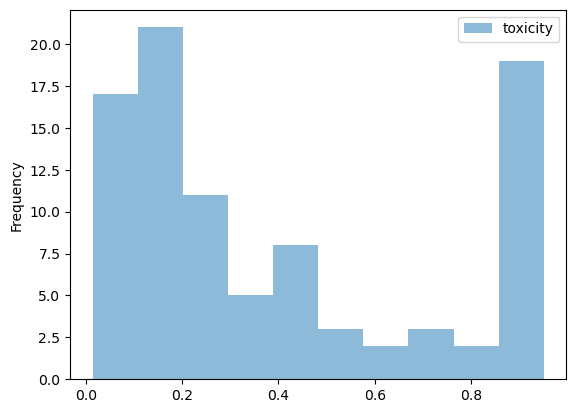

In [66]:
content.plot.hist(y='toxicity', bins=10, alpha=0.5)

In [67]:
content[content['toxicity']>0.9]

,body,username,toxicity,identity
2,White trash pieces of shit who are going to be...,Tifdog11,0.950486,0.717202
4,White trash pieces of shit who are going to be...,Tifdog11,0.950486,0.717202
6,White trash pieces of shit who are going to be...,Tifdog11,0.950486,0.717202
19,White trash pieces of shit who are going to be...,Tifdog11,0.950486,0.717202
29,White trash pieces of shit who are going to be...,Tifdog11,0.950486,0.717202
32,White trash pieces of shit who are going to be...,Tifdog11,0.950486,0.717202
33,White trash pieces of shit who are going to be...,Tifdog11,0.950486,0.717202
36,White trash pieces of shit who are going to be...,Tifdog11,0.950486,0.717202
44,White trash pieces of shit who are going to be...,Tifdog11,0.950486,0.717202
49,White trash pieces of shit who are going to be...,Tifdog11,0.950486,0.717202


In [70]:
pprint(content.iloc[2]['body'])

('White trash pieces of shit who are going to be investigated for inciting a '
 'riot, sedition and conspiracy to commit election fraud. Go fuck yourselves. '
 'Weâ€™re gonna take away your secret service protection, then letâ€™s see how '
 'brave you are, you short dick cheap fuck. Just like that fat piece of shit '
 'your Dad is. I hope you share a cell with a HUGE black guy who treats you '
 'like every animal youâ€™ve killed. We will all laugh. Go suck you off Putin '
 'so you have a place to escape to, you fucking loser. '
 'ðŸ’©ðŸ–•ðŸ\x8f»ðŸ–•ðŸ\x8f»ðŸ–•ðŸ\x8f»ðŸ–•ðŸ\x8f»ðŸ–•ðŸ\x8f»ðŸ–•ðŸ\x8f»ðŸ–•ðŸ\x8f»ðŸ–•ðŸ\x8f»ðŸ–•ðŸ\x8f»ðŸ–•ðŸ\x8f»ðŸ–•ðŸ\x8f»')


>* Q. Which one do you think works better for finding the hate speech? The Perspective API or the classifiers trained with the annotated dataset?